In [4]:
import pandas as pd
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Reading in data
demand = pd.read_excel('../data/silver_institute_supply_and_demand.xlsx', 'Demand')
demand.set_index('Year', inplace=True)
demand.fillna(0, inplace=True)

# Plotting - Total Supply per Year
demand[['Total Physical Demand']]\
.iplot(kind='bar', xTitle='Year',  color='#139A43',
                  yTitle='Demand (million ounces)', 
       title='Total Demand for Silver, Per Year', width=4)

# Plotting - Total Demand per Year & by Sector
demand.loc[:,'Jewelry':'Industrial Fabrication'].iplot(kind='bar', xTitle='Year', 
                  yTitle='Demand (million ounces)', 
       title='Total Demand for Silver, Per Year and By Sector', width=4)

# Plotting - Total Industrial Demand per Year & by Industry
demand.loc[:,'…of which Electrical & Electronics':'…of which Other Industrial*']\
.iplot(kind='bar', xTitle='Year', 
                  yTitle='Demand (million ounces)', 
       title='Total Industrial Demand for Silver, Per Year and By Industry', width=4)


In [5]:
demand.loc[:,'…of which Electrical & Electronics':'…of which Other Industrial*'].sum()

…of which Electrical & Electronics    2587.5
…of which Brazing Alloys & Solders     602.0
…of which Photography                  529.3
…of which Photovoltaic*                549.3
…of which Ethylene Oxide                69.8
…of which Other Industrial*           1591.6
dtype: float64

In [11]:
total = 2587.5 + 602.0 + 529.3 + 549.3 + 69.8 + 1591.6

In [13]:
(549.3/total) * 100

9.263850240323803

In [16]:
(2587.5/total) * 100

43.63774348596003

In [17]:
# Plotting - Total Industrial Demand per Year & by Industry
demand.loc[:,'…of which Electrical & Electronics':'…of which Other Industrial*']\
.iplot(kind='line', xTitle='Year', 
                  yTitle='Demand (million ounces)', 
       title='Total Industrial Demand for Silver, Per Year and By Industry', width=4)

In [1]:
# Solar Silver Fabrication Forecast (Taking Thrifting into Account)

In [52]:
modern_ene_cons = pd.read_csv('../data/modern-renewable-energy-consumption.csv')
solar_con = modern_ene_cons[modern_ene_cons['Entity']=='World'][['Year', 'Solar (terawatt-hours)']]
solar_dem_min_thrift = solar_con.copy().iloc[44:]
solar_dem_min_thrift

,Year,Solar (terawatt-hours)
4168,2009,20.917919
4169,2010,33.816254
4170,2011,64.695112
4171,2012,100.033907
4172,2013,137.561154
4173,2014,196.332988
4174,2015,256.190929
4175,2016,333.052493


In [65]:
est_thrifting = pd.read_excel('../data/silver_solar_thrifting_estimates.xlsx')
est_thrifting

,Year,Market Average Silver Loadings (g/cell)
0,2009,0.398
1,2010,0.300
2,2011,0.260
3,2012,0.220
4,2013,0.176
5,2014,0.155
6,2015,0.142
7,2016,0.135
8,2017,0.126
9,2018,0.100


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.0.


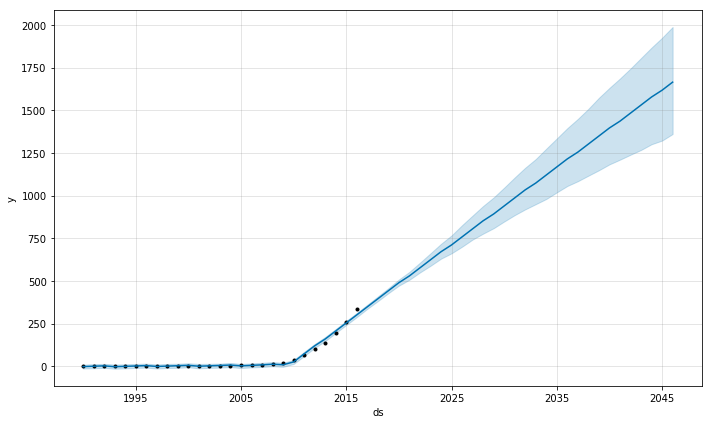

In [62]:
### Consumption forecast ###
# Read in data
solar_con = pd.read_csv('../data/modern-renewable-energy-consumption.csv')
solar_con = solar_con[modern_ene_cons['Entity']=='World'][['Year', 'Solar (terawatt-hours)']].iloc[25:]

# Create dataframe (Prophet needs columns 'ds' and 'y')
fc_consumption = pd.DataFrame(columns=['ds','y'])
fc_consumption['ds'] = solar_con['Year'].values
fc_consumption['ds']  = fc_consumption['ds'].apply(lambda d: datetime.datetime.strptime(str(d), "%Y")) 
fc_consumption['y'] = solar_con['Solar (terawatt-hours)'].values

# Create Prophet model
model_consumption = fbprophet.Prophet(changepoint_prior_scale=0.15)
model_consumption.fit(fc_consumption)

# Create dataframe to hold forecasted vzlues
future_df_consumption = model_consumption.make_future_dataframe(periods=30, freq='y')

# Forecast using Prophet model, and plot
forecast_consumption = model_consumption.predict(future_df_consumption)
model_consumption.plot(forecast_consumption);

In [60]:
solar_con = pd.read_csv('../data/modern-renewable-energy-consumption.csv')
solar_con = solar_con[modern_ene_cons['Entity']=='World'][['Year', 'Solar (terawatt-hours)']]
solar_con.iloc[18:]

,Year,Solar (terawatt-hours)
4142,1983,0.003000
4143,1984,0.006311
4144,1985,0.011747
4145,1986,0.015184
4146,1987,0.010603
4147,1988,0.010196
4148,1989,0.262223
4149,1990,0.386563
4150,1991,0.506460
4151,1992,0.468813


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.0.
/Users/pst-home/anaconda3/envs/data_science/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



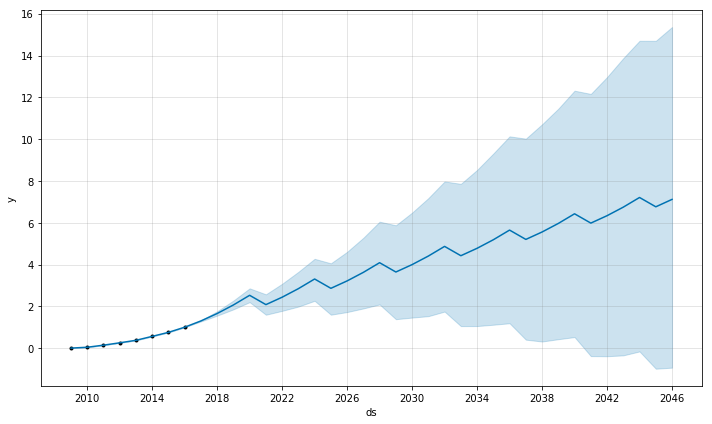

In [45]:
import datetime
import pandas as pd
from sklearn import preprocessing
import fbprophet

solar_consumption = pd.read_csv('../data/modern-renewable-energy-consumption.csv')
solar_consumption = solar_consumption[solar_consumption['Entity']=='World'][['Year', 'Solar (terawatt-hours)']]
solar_consumption = solar_consumption.copy().iloc[44:]

est_thrifting = pd.read_excel('../data/silver_solar_thrifting_estimates.xlsx')
est_thrifting

# Normalize both Estimated Silver loadings and Solar Consumption
min_max_scaler = preprocessing.MinMaxScaler()
consumption_scaled = min_max_scaler.fit_transform(solar_dem_min_thrift['Solar (terawatt-hours)'].values.reshape(-1, 1))
thrifting_scaled = min_max_scaler.fit_transform(est_thrifting['Market Average Silver Loadings (g/cell)'].values.reshape(-1, 1))

scaled_consumption_df = pd.DataFrame(columns=['Year', 'Solar Consumption (Scaled)'])
scaled_thrifting_df = pd.DataFrame(columns=['Year', 'Silver Loadings (Scaled)'])

scaled_consumption_df['Year'] = solar_consumption['Year']
scaled_thrifting_df['Year'] = est_thrifting['Year']
scaled_consumption_df['Solar Consumption (Scaled)'] = consumption_scaled
scaled_thrifting_df['Silver Loadings (Scaled)'] = thrifting_scaled

# Create forecast for both datasets using Facebook Prophet
## Consumption forecast
fc_consumption = pd.DataFrame(columns=['ds','y'])
fc_consumption['ds'] = scaled_consumption_df['Year'].values
fc_consumption['ds']  = fc_consumption['ds'].apply(lambda d: datetime.datetime.strptime(str(d), "%Y")) 
fc_consumption['y'] = scaled_consumption_df['Solar Consumption (Scaled)'].values
model_consumption = fbprophet.Prophet(changepoint_prior_scale=0.15)
model_consumption.fit(fc_consumption)
future_df_consumption = model_consumption.make_future_dataframe(periods=30, freq='y')
forecast_consumption = model_consumption.predict(future_df_consumption)
model_consumption.plot(forecast_consumption);


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.0.


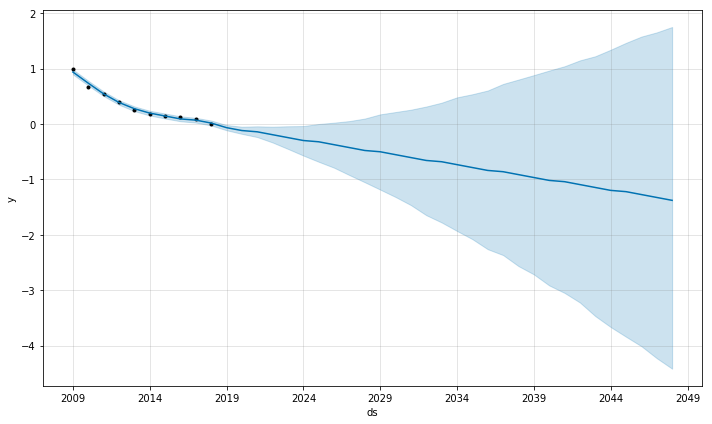

In [49]:
## Thrifting (Silver Loadings) forecast
fc_loadings = pd.DataFrame(columns=['ds','y'])
fc_loadings['ds'] = scaled_thrifting_df['Year'].values
fc_loadings['ds']  = fc_loadings['ds'].apply(lambda d: datetime.datetime.strptime(str(d), "%Y")) 
fc_loadings['y'] = scaled_thrifting_df['Silver Loadings (Scaled)'].values
model_loadings = fbprophet.Prophet(changepoint_prior_scale=0.2)
model_loadings.fit(fc_loadings)
future_df_loadings = model_loadings.make_future_dataframe(periods=30, freq='y')
forecast_loadings = model_loadings.predict(future_df_loadings)
model_loadings.plot(forecast_loadings);

In [63]:
est_thrifting

,Year,Market Average Silver Loadings (g/cell)
0,2009,0.398
1,2010,0.300
2,2011,0.260
3,2012,0.220
4,2013,0.176
5,2014,0.155
6,2015,0.142
7,2016,0.135
8,2017,0.126
9,2018,0.100


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.0.


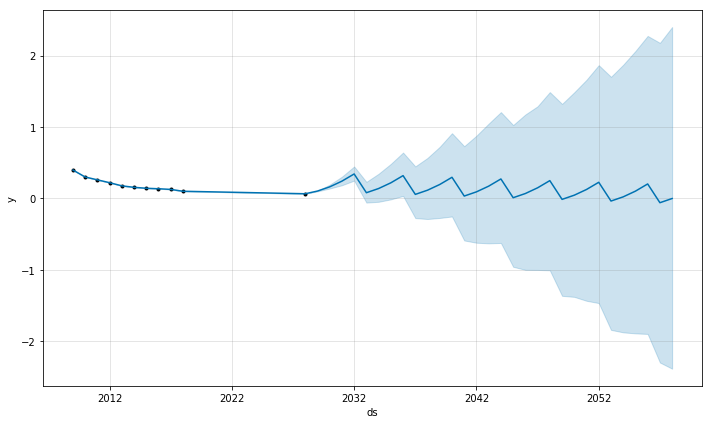

In [86]:
## Read in data (skip 2028 Silver Institute 'predicted' entry)
est_thrifting = pd.read_excel('../data/silver_solar_thrifting_estimates.xlsx')
fc_loadings = pd.DataFrame(columns=['ds','y'])
fc_loadings['ds'] = est_thrifting['Year'].values
fc_loadings['ds']  = fc_loadings['ds'].apply(lambda d: datetime.datetime.strptime(str(d), "%Y")) 
fc_loadings['y'] = est_thrifting['Market Average Silver Loadings (g/cell)'].values
model_loadings = fbprophet.Prophet(changepoint_prior_scale=5)
model_loadings.fit(fc_loadings)
future_df_loadings = model_loadings.make_future_dataframe(periods=30, freq='y')
forecast_loadings = model_loadings.predict(future_df_loadings)
model_loadings.plot(forecast_loadings);

In [84]:
est_thrifting.iloc[0:10]

,Year,Market Average Silver Loadings (g/cell)
0,2009,0.398
1,2010,0.300
2,2011,0.260
3,2012,0.220
4,2013,0.176
5,2014,0.155
6,2015,0.142
7,2016,0.135
8,2017,0.126
9,2018,0.100


In [88]:
loadings_df = forecast_loadings[['ds', 'yhat']].iloc[0:11]

In [450]:
import datetime
import pandas as pd
from sklearn import preprocessing
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt


est_thrifting = pd.read_excel('../data/silver_solar_thrifting_estimates.xlsx')
est_thrifting

# Normalize both Estimated Silver loadings and Solar Consumption
min_max_scaler = preprocessing.MinMaxScaler()
thrifting_scaled = min_max_scaler.fit_transform(est_thrifting)

scaled_thrifting_df = pd.DataFrame(columns=['Year', 'Silver Loadings (Scaled)'], data=thrifting_scaled)

# scaled_thrifting_df = pd.DataFrame(columns=scaled_thrifting_df.columns,data=thrifting_scaled)

/Users/pst-home/anaconda3/envs/data_science/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



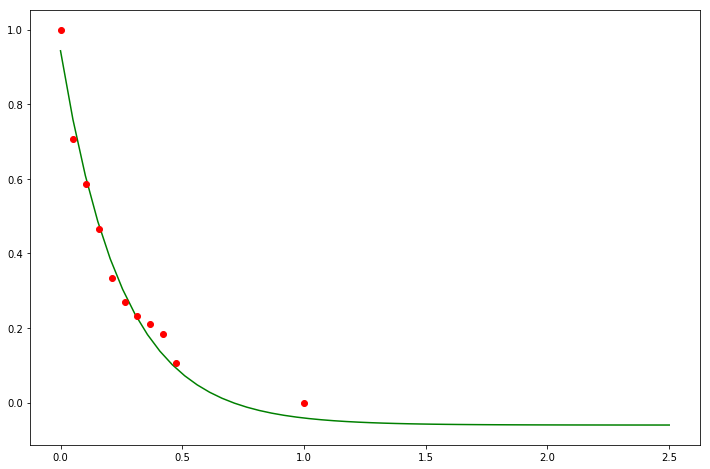

In [451]:
xdata = scaled_thrifting_df['Year'].values
ydata = scaled_thrifting_df['Silver Loadings (Scaled)'].values
x = np.array(xdata)
y = np.array(ydata)

def f(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = optimize.curve_fit(f,x,y, bounds=([0,0,-0.15], [10,10, -0.06]))
# popt, pcov = optimize.curve_fit(f,x,y)
x1 = np.linspace(0,2.5,num =50)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x1, f(x1, *popt), 'g',)
plt.plot(x,y,'ro')
plt.show()

In [445]:
popt

array([ 1.00341038,  3.97532537, -0.06      ])

In [446]:
fitted = pd.DataFrame([x1, f(x1, *popt)]).T
pd.DataFrame(min_max_scaler.inverse_transform(fitted)).sort_values(by=0)

,0,1
0,2009.000000,0.379156
1,2009.969388,0.317816
2,2010.938776,0.267737
3,2011.908163,0.226851
4,2012.877551,0.193471
5,2013.846939,0.166219
6,2014.816327,0.143970
7,2015.785714,0.125805
8,2016.755102,0.110975
9,2017.724490,0.098867


In [460]:
pd.DataFrame(fitted).sort_values(by=0)

,0,1
0,0.000000,0.943410
1,0.051020,0.759207
2,0.102041,0.608820
3,0.153061,0.486040
4,0.204082,0.385799
5,0.255102,0.303961
6,0.306122,0.237146
7,0.357143,0.182597
8,0.408163,0.138062
9,0.459184,0.101702


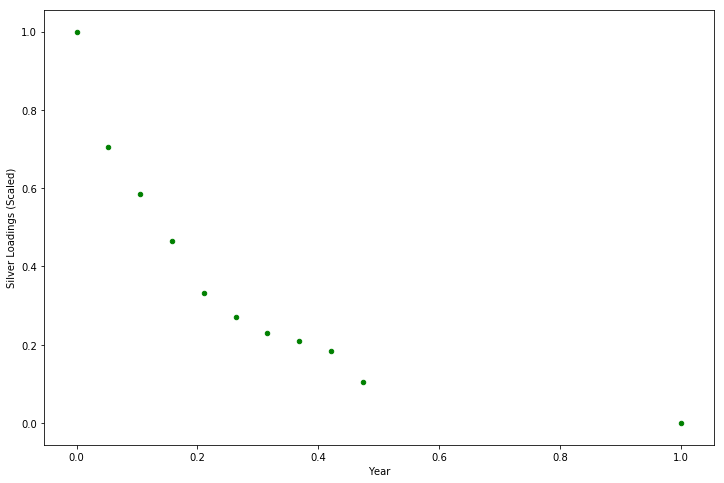

In [459]:
scaled_thrifting_df.plot.scatter(x='Year', y='Silver Loadings (Scaled)', c='green')

In [458]:
scaled_thrifting_df

,Year,Silver Loadings (Scaled)
0,0.000000,1.000000
1,0.052632,0.705706
2,0.105263,0.585586
3,0.157895,0.465465
4,0.210526,0.333333
5,0.263158,0.270270
6,0.315789,0.231231
7,0.368421,0.210210
8,0.421053,0.183183
9,0.473684,0.105105


In [462]:
forecast_consumption[['ds', 'yhat']]

,ds,yhat
0,1990-01-01,-2.371808
1,1991-01-01,-0.212546
2,1992-01-01,1.964603
3,1993-01-01,-3.036854
4,1994-01-01,-0.897657
5,1995-01-01,1.261605
6,1996-01-01,3.438754
7,1997-01-01,-1.562701
8,1998-01-01,0.576498
9,1999-01-01,2.735813


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.0.


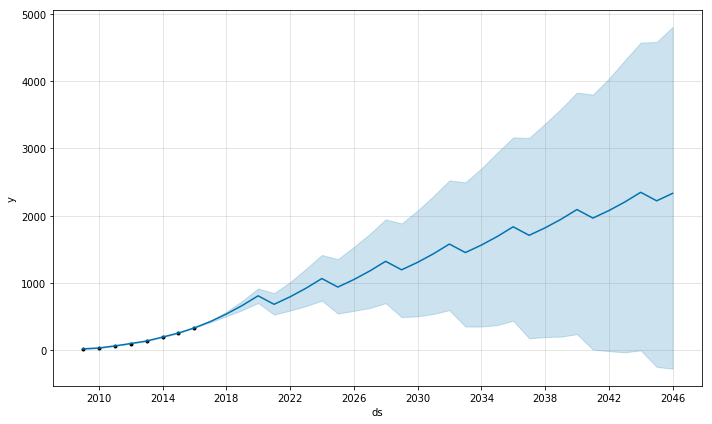

In [471]:
import datetime
import pandas as pd
from sklearn import preprocessing
import fbprophet

solar_consumption = pd.read_csv('../data/modern-renewable-energy-consumption.csv')
solar_consumption = solar_consumption[solar_consumption['Entity']=='World'][['Year', 'Solar (terawatt-hours)']]
solar_consumption = solar_consumption.copy().iloc[44:]


# Create forecast for both datasets using Facebook Prophet
## Consumption forecast
fc_consumption = pd.DataFrame(columns=['ds','y'])
fc_consumption['ds'] = solar_consumption['Year'].values
fc_consumption['ds']  = fc_consumption['ds'].apply(lambda d: datetime.datetime.strptime(str(d), "%Y")) 
fc_consumption['y'] = solar_consumption['Solar (terawatt-hours)'].values
model_consumption = fbprophet.Prophet(changepoint_prior_scale=0.15)
model_consumption.fit(fc_consumption)
future_df_consumption = model_consumption.make_future_dataframe(periods=30, freq='y')
forecast_consumption = model_consumption.predict(future_df_consumption)

model_consumption.plot(forecast_consumption);

/Users/pst-home/anaconda3/envs/data_science/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



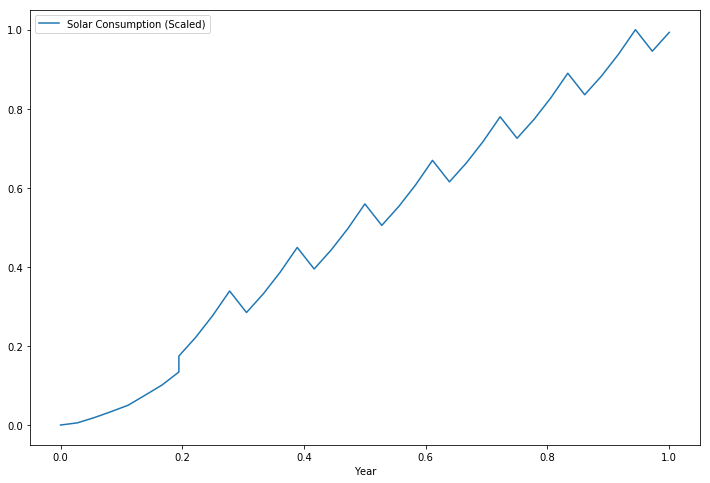

In [495]:
temp = forecast_consumption[['ds', 'yhat']]
temp['ds'] = temp['ds'].apply(lambda d: d.year)
norm_fc_cons = min_max_scaler.fit_transform(temp)
scaled_consumption_df = pd.DataFrame(columns=['Year', 'Solar Consumption (Scaled)'], data=norm_fc_cons)
scaled_consumption_df.plot(x='Year', y='Solar Consumption (Scaled)')

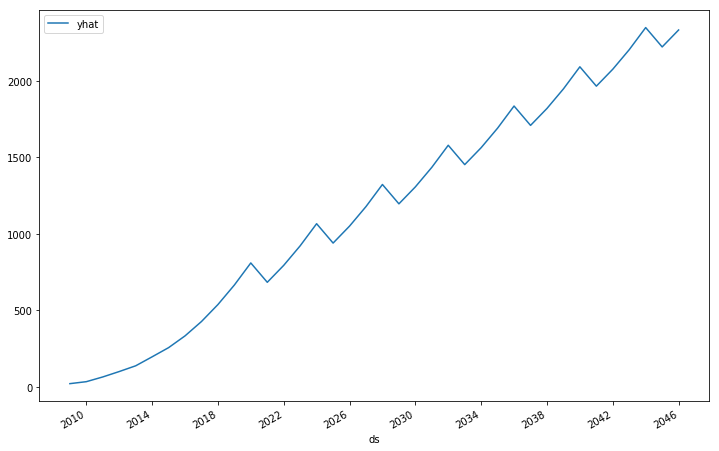

In [492]:
forecast_consumption[['ds', 'yhat']].plot(x='ds', y='yhat')

In [466]:
solar_consumption

,Year,Solar (terawatt-hours)
4168,2009,20.917919
4169,2010,33.816254
4170,2011,64.695112
4171,2012,100.033907
4172,2013,137.561154
4173,2014,196.332988
4174,2015,256.190929
4175,2016,333.052493


In [497]:
test = np.array([2009,2010,2011]).reshape(-1, 1)
min_max_scaler.fit_transform(test)

/Users/pst-home/anaconda3/envs/data_science/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



array([[0. ],
       [0.5],
       [1. ]])

In [16]:
import requests
from bs4 import BeautifulSoup

## Silver 
res = requests.get("https://www.macrotrends.net/1470/historical-silver-prices-100-year-chart")
soup = BeautifulSoup(res.content, 'lxml')
tables = soup.find_all('table')
headers = ['Year', 'Average Closing', 'Year Open', 'Year High', 'Year Low', 'Year Close', 'Annual % Change']
df_silver = pd.DataFrame(pd.read_html(str(tables[0]))[0])
df_silver.columns = headers


def convert_to_float_if_applicable(cell):
    if isinstance(cell, str) and '$' in cell:
        try:
            cell = float(cell.replace('$', '').replace(',',''))
            return cell
        except:
            return cell
    elif isinstance(cell, str) and '%' in cell:
        try:
            cell = float(cell.replace('%', ''))
            return cell
        except:
            return cell
    else:
        return cell

    
    
df_silver = df_silver.applymap(lambda cell: convert_to_float_if_applicable(cell))
df_silver.rename(columns={'Average Closing': 'Average Closing, Silver'}, inplace=True)

df_silver.set_index('Year')[['Average Closing, Silver']]\
.iplot(kind='line', xTitle='Year', color='#C0C0C0',
                  yTitle='Average Closing Price in Dollars ($)', 
       title='Average Closing Prices for Silver', width=4)

In [15]:
df_silver['Year']

0     2019
1     2018
2     2017
3     2016
4     2015
5     2014
6     2013
7     2012
8     2011
9     2010
10    2009
11    2008
12    2007
13    2006
14    2005
15    2004
16    2003
17    2002
18    2001
19    2000
20    1999
21    1998
22    1997
23    1996
24    1995
25    1994
26    1993
27    1992
28    1991
29    1990
30    1989
31    1988
32    1987
33    1986
34    1985
35    1984
36    1983
37    1982
38    1981
39    1980
40    1979
41    1978
42    1977
43    1976
44    1975
45    1974
46    1973
47    1972
48    1971
49    1970
50    1969
Name: Year, dtype: int64